In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


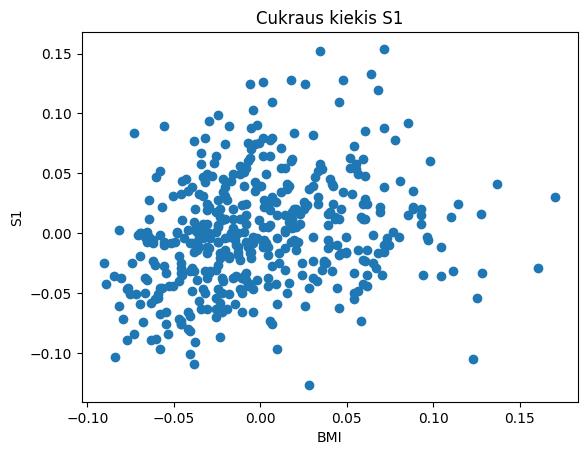

In [2]:
# 1) Remiantis pavyzdžiu, kuriame analizavome iris datasetą, pasirinkite kitą datasetą iš sklearn.datasets (from sklearn.datasets import load_diabetes). 
# Susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. 
# Atlikę šiuos žingsnius apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.


diabetes = load_diabetes()

# Perkeliame duomenis į DataFrame
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# # Spausdiname pirmas kelias eilutes
print(data.head())

plt.scatter(data['bmi'], data['s1'])
plt.xlabel('BMI')
plt.ylabel('S1')
plt.title('Cukraus kiekis S1')
plt.show()

In [3]:
X = data.drop(columns='target')
y = data['target']

# Dviejų klasių sukūrimas (aukštas ir žemas cukraus kiekis)
y = (y > y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_model)}')

# Decision Tree 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}')

Random Forest Accuracy: 0.7191011235955056
Decision Tree Accuracy: 0.6966292134831461


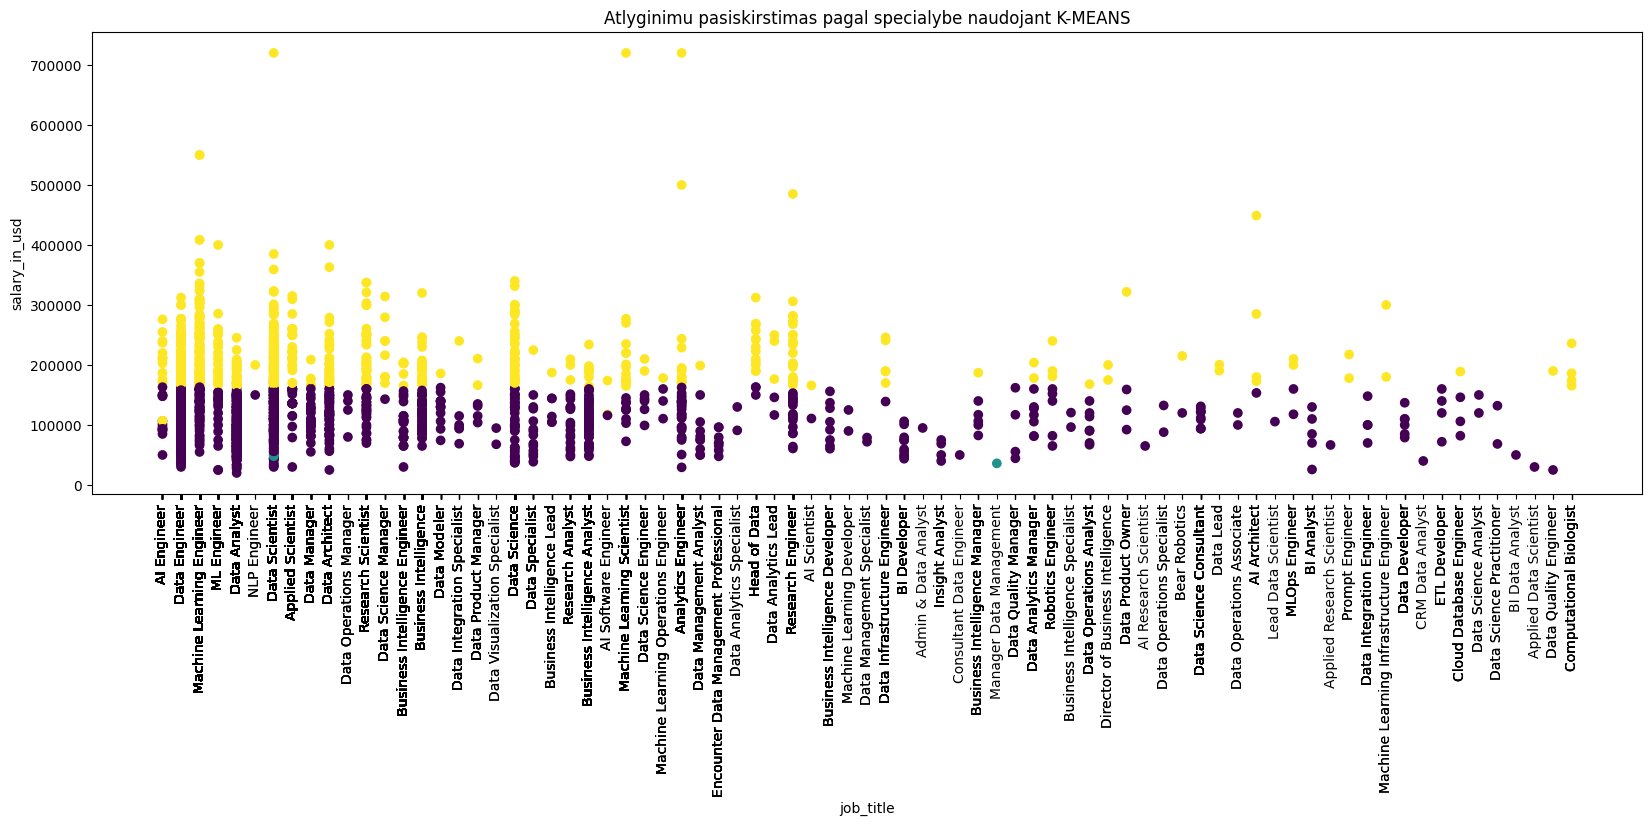

In [4]:
# Parsisiųskite datasetą iš kaggle (arba iš kitų šaltinių). 
# Turėdami jį, atlikite šiuos žingsnius: susipažinkite su jame esančiais duomenimis, nusibraižykite scatter plot, kuriame matysite duomenų išsidėstymą. 
# Atlikę šiuos žingsnius apmokykite modelį naudojant RandomForestClassification ir taip pat DecisionTreesClassification.

df = pd.read_csv('salaries.csv')

drop = df.drop(columns='salary_currency')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 4:5])

kmeans = KMeans(n_clusters=3, random_state= 42)


clusters = kmeans.fit_predict(scaled_data)
plt.figure(figsize=(20,6))
plt.scatter(df['job_title'], df['salary_in_usd'], c=clusters, cmap='viridis')
plt.xticks(df['job_title'], rotation='vertical')
plt.xlabel('job_title')
plt.ylabel('salary_in_usd')
plt.title('Atlyginimu pasiskirstimas pagal specialybe naudojant K-MEANS')
plt.show()



Accuracy: 0.9871244635193133


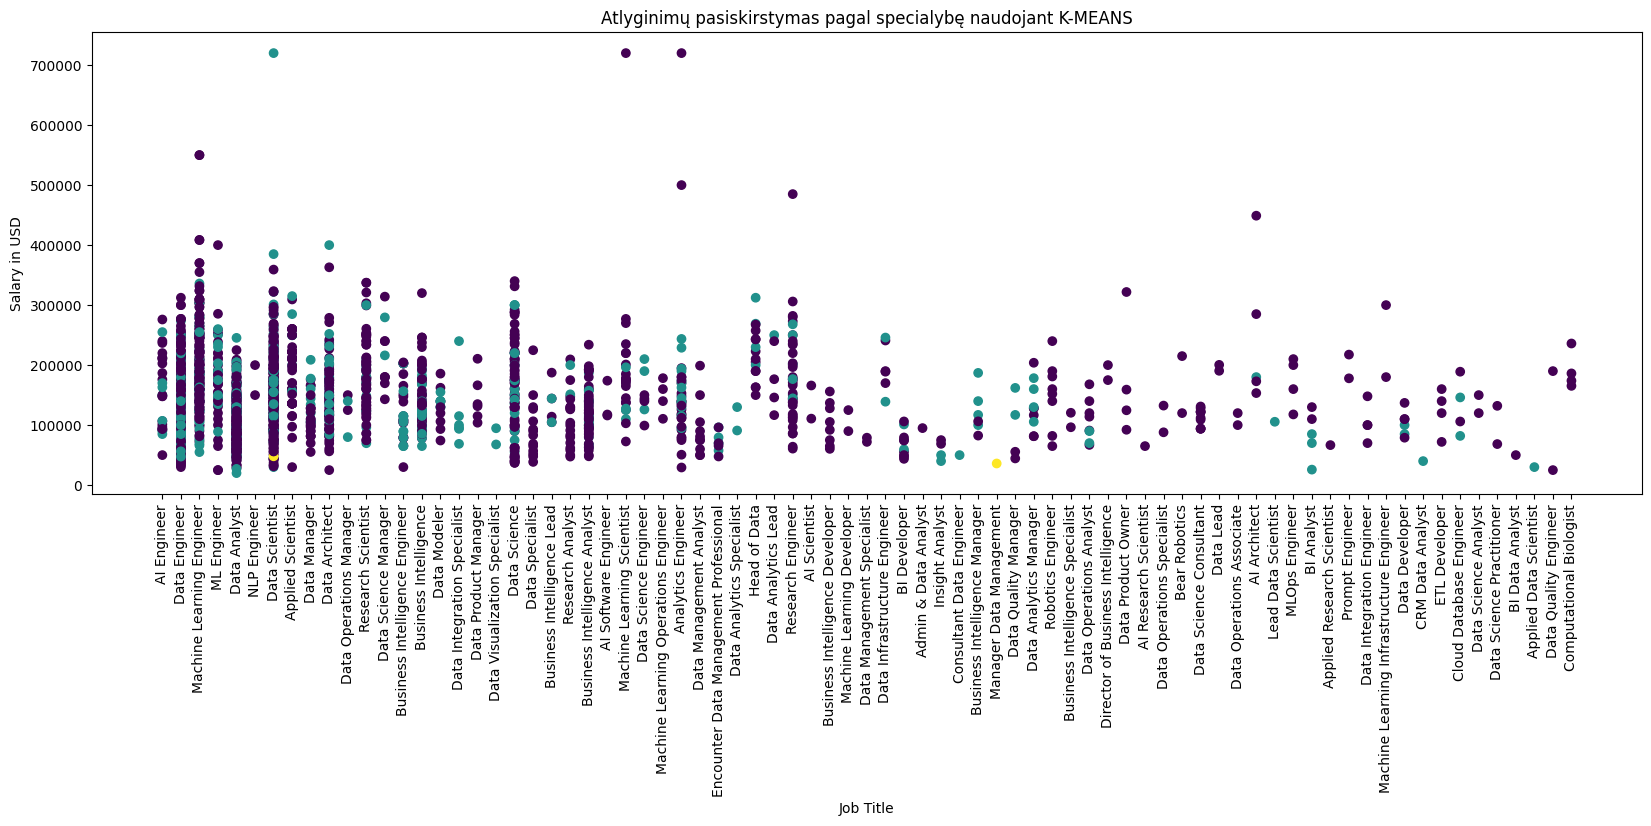

In [5]:
# 1. Nuskaitykite duomenis
df = pd.read_csv('salaries.csv')

# 2. Apdorokite duomenis, pašalinkite nereikalingus stulpelius
df = df.drop(columns='salary_currency')

# Pasirinkite požymius ir tikslą
X = df.drop(columns='salary_in_usd')
y = df['salary_in_usd']

# Kadangi salary_in_usd yra tęstinė vertė, reikia ją paversti klasėmis (pvz., aukštas, vidutinis, žemas)
# Naudokime kvantiles, kad sukurtume kategorijas
y_binned = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

# 3. Normalizuokite skaitmeninius požymius (jei turite skaitmeninius stulpelius)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X.select_dtypes(include=[float, int]))

# Konvertuokime normalizuotus požymius atgal į DataFrame ir prijunkime kategorinius požymius
X_scaled = pd.DataFrame(scaled_features, columns=X.select_dtypes(include=[float, int]).columns)
X = pd.concat([X_scaled, X.select_dtypes(exclude=[float, int]).reset_index(drop=True)], axis=1)

# Konvertuokime kategorinius požymius į skaitmeninius naudojant one-hot encoding
X = pd.get_dummies(X)

# 4. Padalykite duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# 5. Apmokykite „RandomForestClassifier“
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 6. Vertinkite modelio tikslumą
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 7. Nubraižykite scatter plot
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(20, 6))
plt.scatter(df['job_title'], df['salary_in_usd'], c=clusters, cmap='viridis')
plt.xticks(rotation='vertical')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.title('Atlyginimų pasiskirstymas pagal specialybę naudojant K-MEANS')
plt.show()

In [6]:
# 2) dar vienas variantas

wine = pd.read_csv('winequalityN.csv', sep=',')

Y = wine['quality']
X = wine.drop('quality', axis= 1)
X = X.drop('type', axis= 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)


0.6123076923076923
